In [12]:
# Install the requirements

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time 

# Gaussian Distribution of sum of samples

In [14]:
X = 10 # number of distributions
Y = 100 # number of samples from each single distribution

distributions = []

for i in range(X):
    random_seed = np.random.randint(0,100)
    np.random.seed( random_seed )#int(time.time()))
    random_gen_values = (np.random.uniform(low=0, high=1, size=Y).tolist())

    distributions.append(random_gen_values)



In [15]:

# random samples of Y size from all X no.of distributions
all_data = pd.DataFrame(distributions).T
all_data.columns = [f'Distri_{x}' for x in range(1,X+1)]

melt_df = pd.melt(all_data, var_name='distributions', value_name='random_value')
melt_df

,distributions,random_value
0,Distri_1,0.046041
1,Distri_1,0.370242
2,Distri_1,0.242318
3,Distri_1,0.628480
4,Distri_1,0.990110
...,...,...
995,Distri_10,0.475764
996,Distri_10,0.796761
997,Distri_10,0.717242
998,Distri_10,0.147148


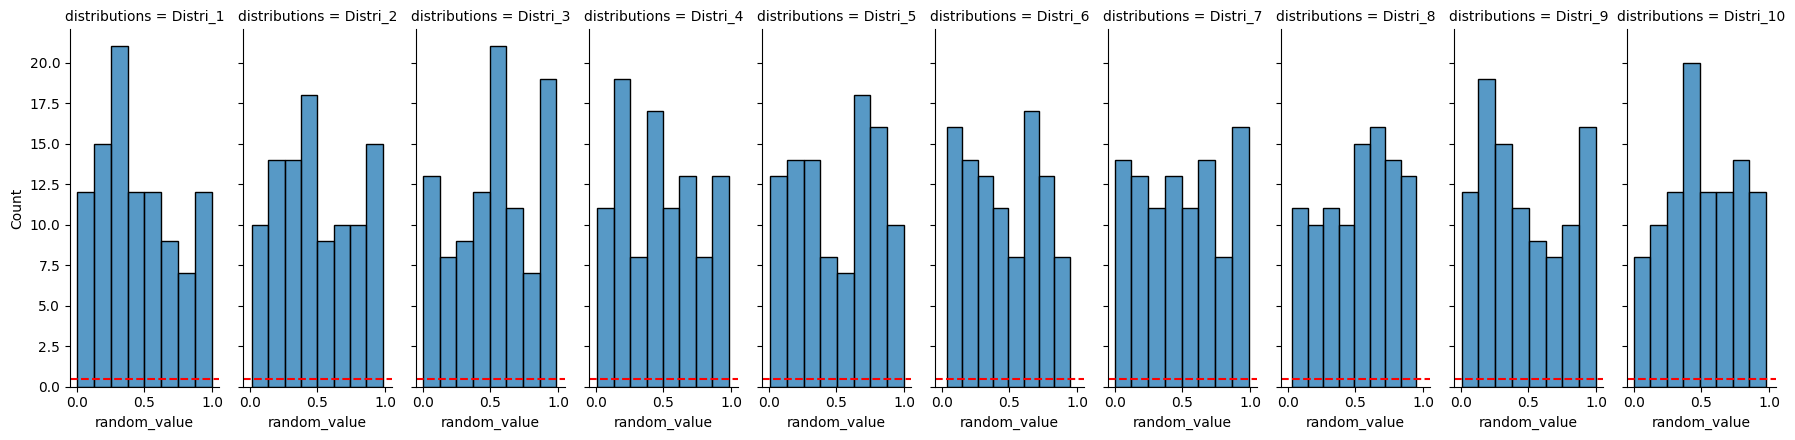

In [23]:
# Distribution of X individual distributions
g = sns.FacetGrid(melt_df,col='distributions', height=4.5, aspect=.4)
g.map(sns.histplot,'random_value')
g.refline(y=melt_df['random_value'].mean(),color='r')

In [17]:

# columns  is no.of different distributions of same type and  index are the random values generated from the distribution

# Row wise sum of all the distribution random values
all_data['row_sum'] = all_data.sum(axis=1)
all_data#.T.reset_index()

,Distri_1,Distri_2,Distri_3,Distri_4,Distri_5,Distri_6,Distri_7,Distri_8,Distri_9,Distri_10,row_sum
0,0.046041,0.248510,0.553941,0.010374,0.650374,0.106738,0.417022,0.588131,0.836944,0.076308,3.534384
1,0.370242,0.449975,0.396248,0.501875,0.505453,0.684343,0.720324,0.897714,0.970236,0.779919,6.276329
2,0.242318,0.410941,0.048127,0.495773,0.878601,0.534963,0.000114,0.891531,0.447154,0.438409,4.387931
3,0.628480,0.260300,0.525673,0.133830,0.181840,0.369187,0.302333,0.815837,0.284581,0.723465,4.225525
4,0.990110,0.870396,0.153039,0.142111,0.852233,0.412615,0.146756,0.035890,0.771217,0.977990,5.352355
...,...,...,...,...,...,...,...,...,...,...,...
95,0.538696,0.963871,0.551613,0.037969,0.386451,0.817206,0.237027,0.515092,0.749404,0.475764,5.273094
96,0.438111,0.885476,0.958215,0.500108,0.833791,0.648451,0.903380,0.924419,0.194347,0.796761,7.083058
97,0.713929,0.368226,0.062537,0.083543,0.774946,0.140053,0.573679,0.581243,0.912880,0.717242,4.928279
98,0.317657,0.341829,0.125421,0.791318,0.803534,0.471232,0.002870,0.773256,0.683966,0.147148,4.458232


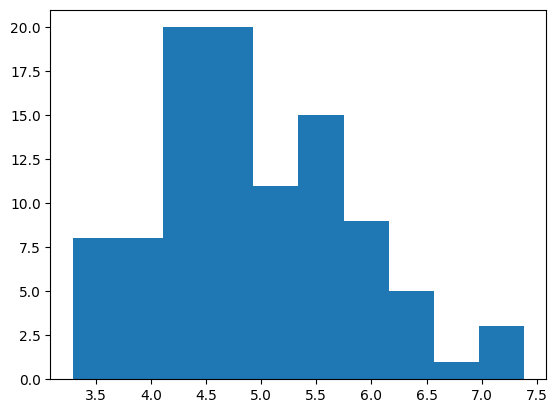

In [18]:
plt.hist(all_data['row_sum'])
plt.show()

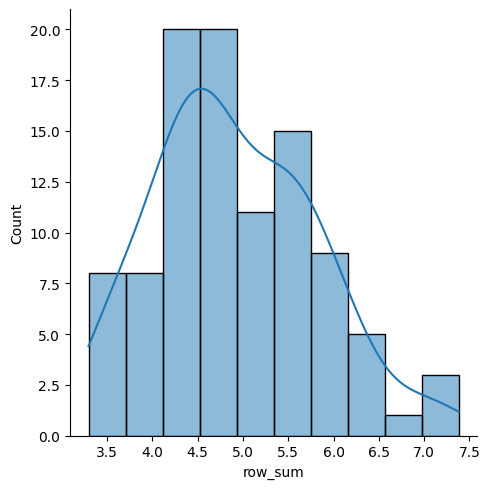

In [19]:
sns.displot(all_data['row_sum'], kde=True, bins=10)
plt.show()